In [3]:
!pip3 install pandas --user

In [4]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [5]:
investments_df = pd.read_csv('assets_earnings_investments.csv') 

print(investments_df.head(5))

                         parent_name        utility_name  respondent_id  year  \
0  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   
1  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   
2  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   
3  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   
4  American Electric Power Co., Inc.  AEP Generating Co.            1.0  2020   

   asset                           sub_asset  asset_value  earnings_value  \
0  other                                AROs  -15405378.0            -0.0   
1  other  electric_plant_held_for_future_use    1034099.0             0.0   
2  other     electric_plant_leased_to_others  155616036.0             0.0   
3  other                       general_plant     427318.0             0.0   
4  other                    intangible_plant     724784.0             0.0   

   investment_value  
0               NaN  
1     

In [6]:
utilities = investments_df['utility_name'].unique()
print(sorted(utilities)[:10])  # print first 10 utility names

['4C Acquisition, LLC', 'AEP Appalachian Transmission Co., Inc.', 'AEP Generating Co.', 'AEP Generation Resources Inc.', 'AEP Indiana Michigan Transmission Co., Inc.', 'AEP Kentucky Transmission Co., Inc.', 'AEP Ohio Transmission Co., Inc.', 'AEP Oklahoma Transmission Co., Inc.', 'AEP Southwestern Transmission Co., Inc.', 'AEP Texas Central Co.']


In [7]:
np.count_nonzero(utilities)  # 283 total unique utilitie names

283

In [8]:
investments_df.loc[: , 'utility_name'].value_counts()

Dominion Energy Virginia                          498
Georgia Power Co.                                 487
Alabama Power Co.                                 476
Southern California Edison Co.                    476
Pacific Gas & Electric Co.                        463
                                                 ... 
Citizens Sycamore-Penasquitos Transmission LLC      6
Hagerstown Light Department                         6
Horizon West Transmission, LLC                      6
Pinnacle West Marketing & Trading Co. LLC           5
Wilderness Line Holdings, LLC                       4
Name: utility_name, Length: 283, dtype: int64

In [9]:
filt = (investments_df['utility_name'] == 'AEP Generating Co.')

In [10]:
# testing on the utility "AEP Generating Co."
aep = investments_df.loc[filt]

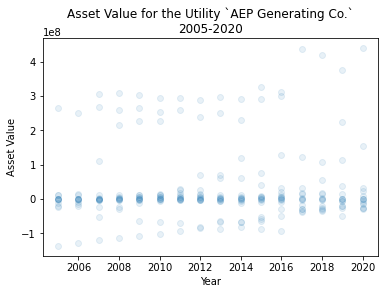

In [11]:
plt.figure() 
plt.title('Asset Value for the Utility `AEP Generating Co.`\n2005-2020') 
                                     
plt.scatter(aep['year']
            ,aep['asset_value']
            ,alpha=0.1
           )
plt.xlabel('Year')
plt.ylabel('Asset Value');

In [12]:
burden_df = pd.read_csv('expenditure_bills_burden.csv')

print(burden_df.head(5))

    parent_name       utility_name  respondent_id  year percent_AMI ownership  \
0  Southern Co.  Alabama Power Co.            2.0  2020       0-30%     owner   
1  Southern Co.  Alabama Power Co.            2.0  2020       0-30%     owner   
2  Southern Co.  Alabama Power Co.            2.0  2020       0-30%     owner   
3  Southern Co.  Alabama Power Co.            2.0  2020       0-30%     owner   
4  Southern Co.  Alabama Power Co.            2.0  2020       0-30%     owner   

  electricity_gas_other    technology   expenditure       bill    burden  
0           Electricity    adjustment  9.276270e+06   8.394506  0.009773  
1           Electricity  distribution  3.017570e+07  27.307328  0.031792  
2           Electricity         hydro  4.312818e+06   3.902860  0.004544  
3           Electricity       nuclear  1.912960e+07  17.311221  0.020154  
4           Electricity         other  1.578084e+07  14.280782  0.016626  


In [13]:
steam = investments_df.loc[(investments_df['asset']=='steam')];
steam = steam.drop(columns=['respondent_id','sub_asset', 'asset_value', 'earnings_value']);
steam

,parent_name,utility_name,year,asset,investment_value
13,"American Electric Power Co., Inc.",AEP Generating Co.,2020,steam,130292560.0
27,"American Electric Power Co., Inc.",AEP Generating Co.,2019,steam,6956564.0
41,"American Electric Power Co., Inc.",AEP Generating Co.,2018,steam,15532520.0
55,"American Electric Power Co., Inc.",AEP Generating Co.,2017,steam,155016674.0
70,"American Electric Power Co., Inc.",AEP Generating Co.,2016,steam,13949078.0
...,...,...,...,...,...
51692,"American Electric Power Co., Inc.",AEP Texas Inc.,2017,steam,1710007.0
52001,Tri-State Generation & Transmission Associatio...,Tri-State G & T Association,2020,steam,18889774.0
52016,Tri-State Generation & Transmission Associatio...,Tri-State G & T Association,2019,steam,218776428.0
52042,Basin Electric Power Coop.,Basin Electric Power Coop.,2020,steam,4493197.0


In [34]:
other_fossil = investments_df.loc[(investments_df['asset']=='other_fossil')];
other_fossil = other_fossil.drop(columns=['respondent_id','sub_asset']);
other_fossil
# investment_value column is missleading. Whle most don't, some companies are reporting
# an investment value on their other fossil

,parent_name,utility_name,year,asset,asset_value,earnings_value,investment_value
69,"American Electric Power Co., Inc.",AEP Generating Co.,2016,other_fossil,3.008174e+08,0.000000,NaN
85,"American Electric Power Co., Inc.",AEP Generating Co.,2015,other_fossil,2.905789e+08,0.000000,NaN
101,"American Electric Power Co., Inc.",AEP Generating Co.,2014,other_fossil,2.904740e+08,0.000000,NaN
117,"American Electric Power Co., Inc.",AEP Generating Co.,2013,other_fossil,2.965017e+08,0.000000,NaN
133,"American Electric Power Co., Inc.",AEP Generating Co.,2012,other_fossil,2.892946e+08,0.000000,NaN
...,...,...,...,...,...,...,...
52000,Tri-State Generation & Transmission Associatio...,Tri-State G & T Association,2020,other_fossil,1.592874e+08,0.000000,NaN
52015,Tri-State Generation & Transmission Associatio...,Tri-State G & T Association,2019,other_fossil,1.645989e+08,0.000000,NaN
52041,Basin Electric Power Coop.,Basin Electric Power Coop.,2020,other_fossil,9.725301e+08,0.000000,NaN
52058,Basin Electric Power Coop.,Basin Electric Power Coop.,2019,other_fossil,1.177345e+09,0.000000,NaN


In [15]:
renewables = investments_df.loc[(investments_df['asset']=='renewables') & (investments_df['sub_asset']=='renewables')];
renewables = renewables.drop(columns=['respondent_id', 'sub_asset', 'asset_value', 'earnings_value']);
renewables
# 2 renewables (rows 23681 and 23709, Xcel Energy) are renewables_arc. The rest are renewables

,parent_name,utility_name,year,asset,investment_value
268,Southern Co.,Alabama Power Co.,2020,renewables,150519.0
299,Southern Co.,Alabama Power Co.,2019,renewables,379312.0
330,Southern Co.,Alabama Power Co.,2018,renewables,4456037.0
361,Southern Co.,Alabama Power Co.,2017,renewables,49839585.0
1532,Pinnacle West Capital Corp.,Arizona Public Service Co.,2020,renewables,15929120.0
...,...,...,...,...,...
50120,Black Hills Corp.,"Black Hills Colorado Electric, LLC",2012,renewables,18076282.0
51908,Algonquin Power & Utilities Corp.,Liberty Utilities (Calpeco Electric) LLC,2020,renewables,585986.0
51921,Algonquin Power & Utilities Corp.,Liberty Utilities (Calpeco Electric) LLC,2019,renewables,NaN
51935,Algonquin Power & Utilities Corp.,Liberty Utilities (Calpeco Electric) LLC,2018,renewables,NaN


In [16]:
hydro = investments_df.loc[(investments_df['asset']=='hydro')];
hydro = hydro.drop(columns=['respondent_id', 'sub_asset', 'asset_value', 'earnings_value']);
hydro

,parent_name,utility_name,year,asset,investment_value
241,Southern Co.,Alabama Power Co.,2020,hydro,78879223.0
272,Southern Co.,Alabama Power Co.,2019,hydro,44924953.0
303,Southern Co.,Alabama Power Co.,2018,hydro,105783991.0
334,Southern Co.,Alabama Power Co.,2017,hydro,36875844.0
365,Southern Co.,Alabama Power Co.,2016,hydro,12592555.0
...,...,...,...,...,...
48707,Entergy Corp.,"Entergy Texas, Inc.",2010,hydro,1.0
48723,Entergy Corp.,"Entergy Texas, Inc.",2009,hydro,NaN
48739,Entergy Corp.,"Entergy Texas, Inc.",2008,hydro,4600.0
49500,Fall River Electric Coop.,"Fall River Electric Coop., Inc",2005,hydro,NaN


In [17]:
nuclear = investments_df.loc[(investments_df['asset']=='nuclear')]
nuclear = nuclear.drop(columns=['respondent_id', 'sub_asset', 'asset_value', 'earnings_value']);
nuclear

,parent_name,utility_name,year,asset,investment_value
242,Southern Co.,Alabama Power Co.,2020,nuclear,129059811.0
273,Southern Co.,Alabama Power Co.,2019,nuclear,59700604.0
304,Southern Co.,Alabama Power Co.,2018,nuclear,104170820.0
335,Southern Co.,Alabama Power Co.,2017,nuclear,79121368.0
366,Southern Co.,Alabama Power Co.,2016,nuclear,94585351.0
...,...,...,...,...,...
51461,Entergy Corp.,"Entergy Louisiana, LLC",2019,nuclear,298466290.0
51482,Entergy Corp.,"Entergy Louisiana, LLC",2018,nuclear,120892141.0
51502,Entergy Corp.,"Entergy Louisiana, LLC",2017,nuclear,242376087.0
51522,Entergy Corp.,"Entergy Louisiana, LLC",2016,nuclear,369484426.0


In [23]:
transmission = investments_df.loc[(investments_df['asset']=='transmission')]
transmission = transmission.drop(columns=['respondent_id', 'sub_asset', 'asset_value', 'earnings_value']);
transmission

In [19]:
distribution = investments_df.loc[(investments_df['asset']=='distribution')]
distribution = distribution.drop(columns=['respondent_id', 'sub_asset', 'asset_value', 'earnings_value']);
distribution

,parent_name,utility_name,year,asset,investment_value
240,Southern Co.,Alabama Power Co.,2020,distribution,560928086.0
271,Southern Co.,Alabama Power Co.,2019,distribution,521505710.0
302,Southern Co.,Alabama Power Co.,2018,distribution,463329553.0
333,Southern Co.,Alabama Power Co.,2017,distribution,408890732.0
364,Southern Co.,Alabama Power Co.,2016,distribution,346170310.0
...,...,...,...,...,...
51987,Tri-State Generation & Transmission Associatio...,Tri-State G & T Association,2020,distribution,8031897.0
52003,Tri-State Generation & Transmission Associatio...,Tri-State G & T Association,2019,distribution,8468951.0
52085,American States Water Co.,"Bear Valley Electric Service, Inc.",2020,distribution,759500.0
52115,"Mckenzie Electric Coop., Inc.","Mckenzie Electric Coop., Inc.",2020,distribution,23551208.0


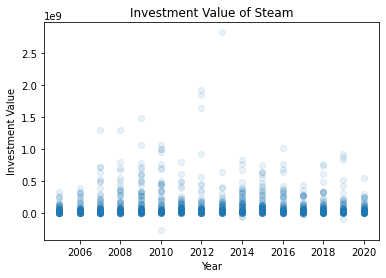

In [20]:
plt.figure() 
plt.title('Investment Value of Steam') 
                                     
plt.scatter(steam['year']
            ,steam['investment_value']
            ,alpha=0.1
           )
plt.xlabel('Year')
plt.ylabel('Investment Value');

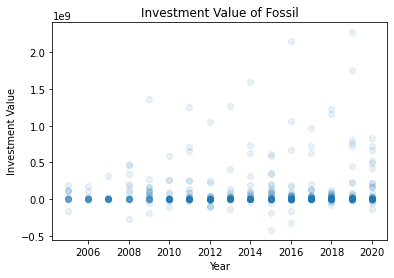

In [22]:
plt.figure() 
plt.title('Investment Value of Fossil') 
                                     
plt.scatter(other_fossil['year']
            ,other_fossil['investment_value']
            ,alpha=0.1
           )
plt.xlabel('Year')
plt.ylabel('Investment Value');

In [2]:
plt.figure() 
plt.title('Investment Value of Renewables') 
                                     
plt.scatter(renewables['year']
            ,renewables['investment_value']
            ,alpha=0.1
           )
plt.xlabel('Year')
plt.ylabel('Investment Value');

NameError: name 'plt' is not defined

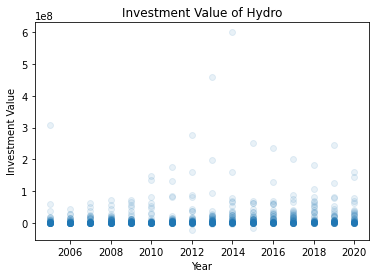

In [38]:
plt.figure() 
plt.title('Investment Value of Hydro') 
                                     
plt.scatter(hydro['year']
            ,hydro['investment_value']
            ,alpha=0.1
           )
plt.xlabel('Year')
plt.ylabel('Investment Value');

In [ ]:
plt.figure() 
plt.title('Investment Value of Nuclear') 
                                     
plt.scatter(nuclear['year']
            ,steam['investment_value']
            ,alpha=0.1
           )
plt.xlabel('Year')
plt.ylabel('Investment Value');